In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats

In [2]:
#Import refined dataset

df = pd.read_csv('data/refined_data.csv')

Visuals to see:
- Bike hires over time
  - Is there any seasonality?
  - Is there a trend?
- Number of bike hires per time of day and type of time
  - Vs. length of bike ride
- Same as above but on day and type of day
- Map of popular start locations 

In [3]:
df.head(5)

,Unnamed: 0,Duration,End DateTime,EndStation Name,Start DateTime,StartStation Name,Start Date,End Date,Start Time,End Time,Start Area,End Area,Start Day,Start Wkday,Start Time of Day,Start Hour,Duration (mins)
0,0,660,2019-01-02 17:47:00,"Bricklayers Arms, Borough",2019-01-02 17:36:00,"Stamford Street, South Bank",2019-01-02,2019-01-02,17:36:00,17:47:00,South Bank,South Bank,Wednesday,Weekday,Evening,17,11.0
1,1,180,2019-01-06 18:14:00,"Bricklayers Arms, Borough",2019-01-06 18:11:00,"Empire Square, The Borough",2019-01-06,2019-01-06,18:11:00,18:14:00,The Borough,The Borough,Sunday,Weekend,Evening,18,3.0
2,2,960,2019-01-02 14:49:00,"Waterloo Station 1, Waterloo",2019-01-02 14:33:00,"Sedding Street, Sloane Square",2019-01-02,2019-01-02,14:33:00,14:49:00,Sloane Square,Sloane Square,Wednesday,Weekday,Afternoon,14,16.0
3,3,120,2019-01-04 12:54:00,"Empire Square, The Borough",2019-01-04 12:52:00,"Bricklayers Arms, Borough",2019-01-04,2019-01-04,12:52:00,12:54:00,Borough,Borough,Friday,Weekday,Afternoon,12,2.0
4,4,120,2019-01-05 16:03:00,"Empire Square, The Borough",2019-01-05 16:01:00,"Bricklayers Arms, Borough",2019-01-05,2019-01-05,16:01:00,16:03:00,Borough,Borough,Saturday,Weekend,Afternoon,16,2.0


In [4]:
datetime_cols = [
    'Start DateTime',
    'Start Date',
    'End DateTime',
    'End Date'
]

In [5]:
for d in datetime_cols:
    df[d] = pd.to_datetime(df[d])

In [6]:
hires_per_day = df['Start Date'].value_counts().sort_index()

Text(0.5, 1.0, 'Number of bike hires by day')

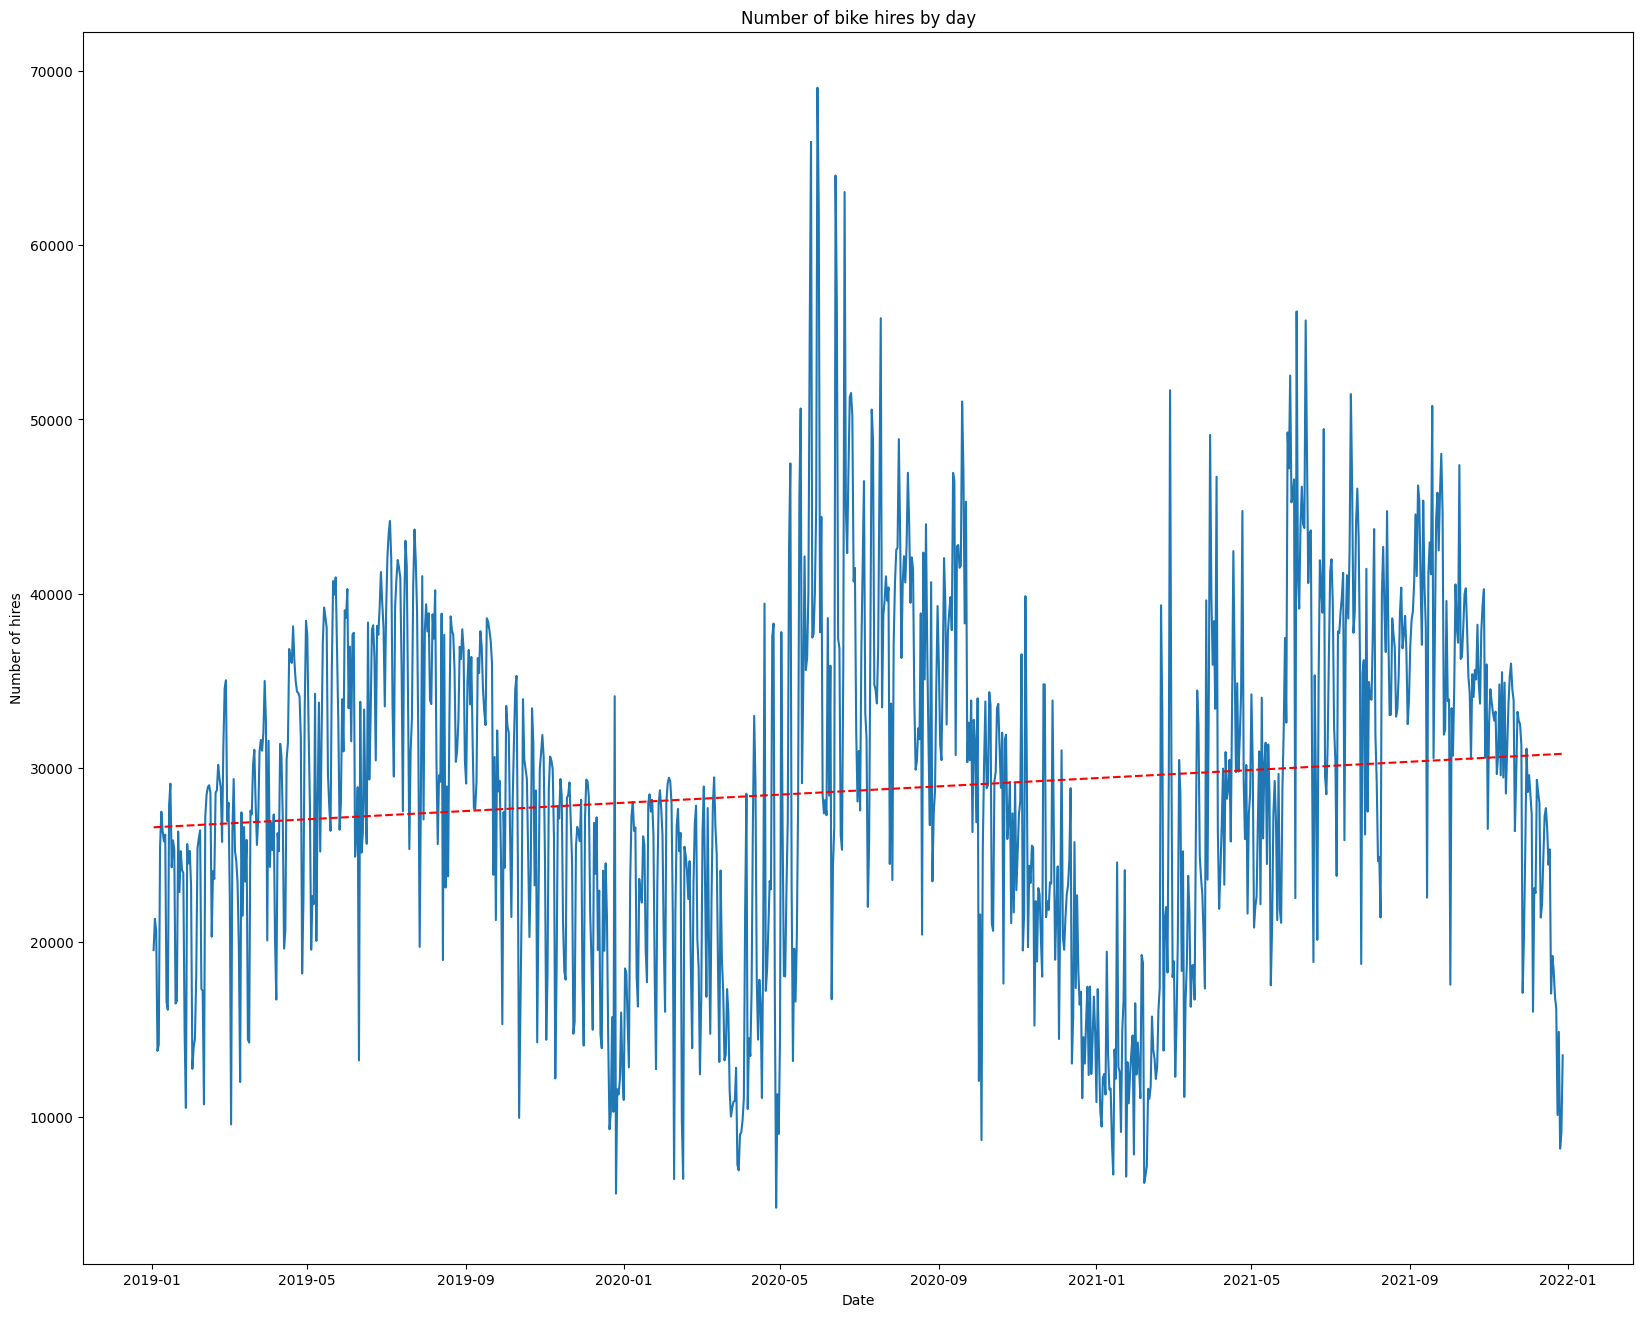

In [24]:
plt.figure(figsize=(20,16))
x = np.array(hires_per_day.index)  # Replace datetime1, datetime2, etc. with your datetime objects
x_numeric = np.arange(len(x))  # Use numerical values as x-axis
y = hires_per_day.values
plt.plot(x, y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, y)
trend_line = slope * x_numeric + intercept

# Plot trend line
plt.plot(x, trend_line, color='red', linestyle='--', label='Trend Line')

plt.xlabel('Date')
plt.ylabel('Number of hires')
plt.title('Number of bike hires by day')

There seems to be some seasonality, with the summer months having higher number of bike hires than the winter months.

We need to examine the trend at a month by month level of granularity to better understand this.

There also seems to be a slightly increasing trend of bike hires over time, albeit not a huge positive trend.

In [10]:
hires_by_month = df.groupby(pd.Grouper(freq="M", key='Start Date'))['Unnamed: 0'].count()

Text(0.5, 1.0, 'Number of bike hires by month')

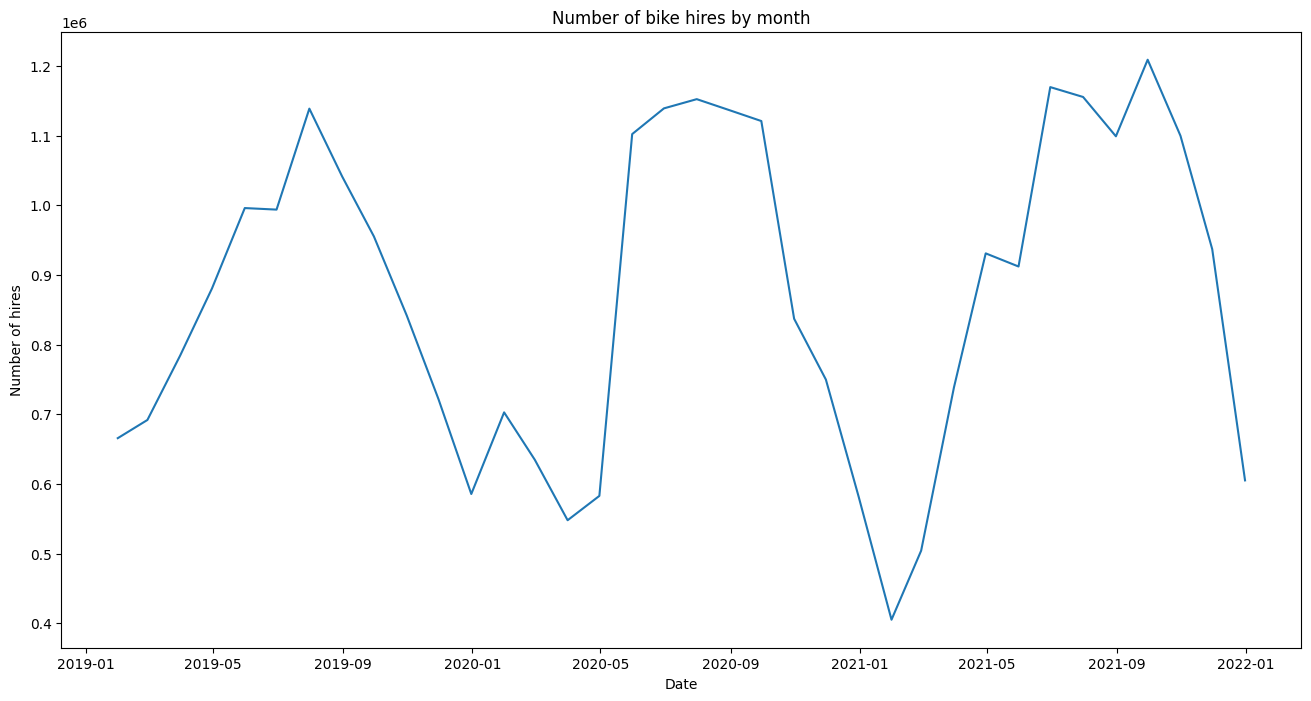

In [13]:
plt.figure(figsize=(16,8))
plt.plot(hires_by_month.index, hires_by_month.values)

plt.xlabel('Date')
plt.ylabel('Number of hires')
plt.title('Number of bike hires by month')

Another clear representation of the seasonality. What is worth doing is looking at when Covid lockdowns occurred as these may highlight the cyclical ups and downs.

We look below at a graph with vertical lines representing Covid lockdown periods

Text(0.5, 1.0, 'Number of bike hires by month - with shaded areas as UK National Covid Lockdowns')

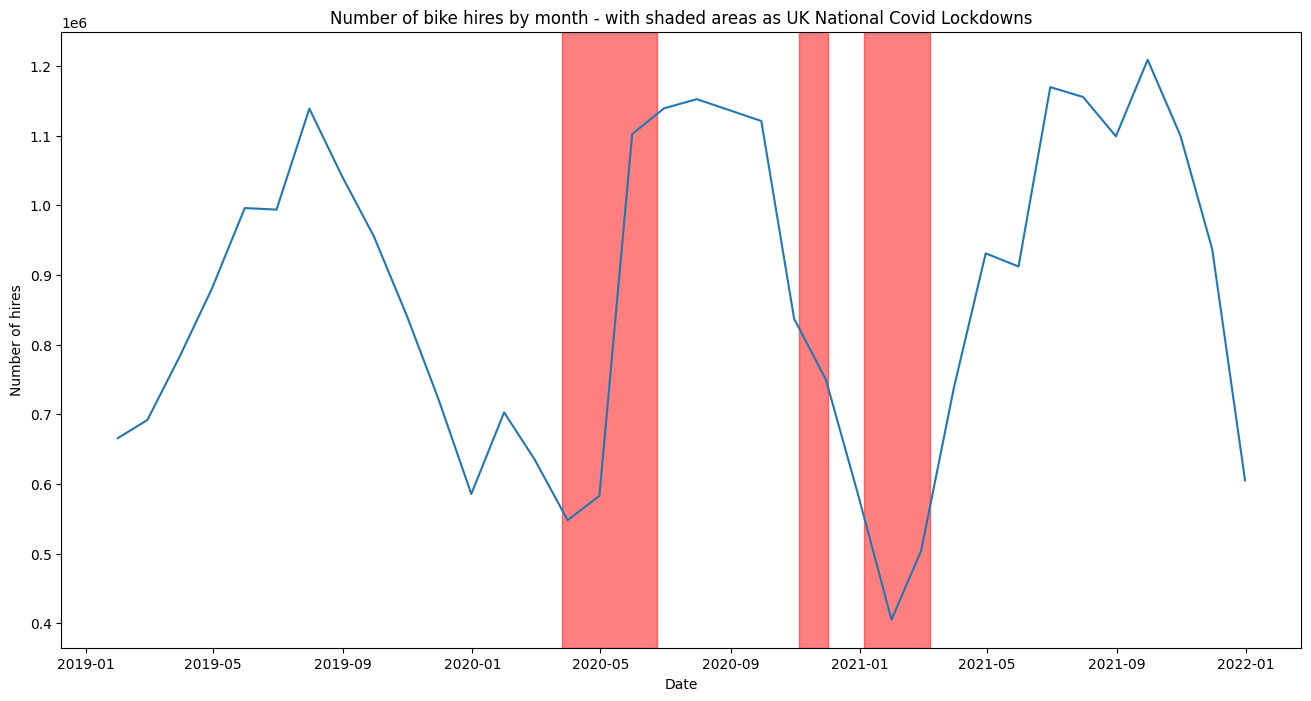

In [19]:
plt.figure(figsize=(16,8))
plt.plot(hires_by_month.index, hires_by_month.values)

plt.axvspan(dt.datetime(2020, 3, 26), dt.datetime(2020, 6, 23), alpha=0.5, color='red')
plt.axvspan(dt.datetime(2020, 11, 5), dt.datetime(2020, 12, 2), alpha=0.5, color='red')
plt.axvspan(dt.datetime(2021, 1, 5), dt.datetime(2021, 3, 8), alpha=0.5, color='red')

plt.xlabel('Date')
plt.ylabel('Number of hires')
plt.title('Number of bike hires by month - with shaded areas as UK National Covid Lockdowns')

There is not enough evidence here to suggest that downturns in bike usage are due to Covid Lockdowns, but they seemed to have an effect in line with seasonal trends too.

In [30]:
df.head()

,Unnamed: 0,Duration,End DateTime,EndStation Name,Start DateTime,StartStation Name,Start Date,End Date,Start Time,End Time,Start Area,End Area,Start Day,Start Wkday,Start Time of Day,Start Hour,Duration (mins)
0,0,660,2019-01-02 17:47:00,"Bricklayers Arms, Borough",2019-01-02 17:36:00,"Stamford Street, South Bank",2019-01-02,2019-01-02,17:36:00,17:47:00,South Bank,South Bank,Wednesday,Weekday,Evening,17,11.0
1,1,180,2019-01-06 18:14:00,"Bricklayers Arms, Borough",2019-01-06 18:11:00,"Empire Square, The Borough",2019-01-06,2019-01-06,18:11:00,18:14:00,The Borough,The Borough,Sunday,Weekend,Evening,18,3.0
2,2,960,2019-01-02 14:49:00,"Waterloo Station 1, Waterloo",2019-01-02 14:33:00,"Sedding Street, Sloane Square",2019-01-02,2019-01-02,14:33:00,14:49:00,Sloane Square,Sloane Square,Wednesday,Weekday,Afternoon,14,16.0
3,3,120,2019-01-04 12:54:00,"Empire Square, The Borough",2019-01-04 12:52:00,"Bricklayers Arms, Borough",2019-01-04,2019-01-04,12:52:00,12:54:00,Borough,Borough,Friday,Weekday,Afternoon,12,2.0
4,4,120,2019-01-05 16:03:00,"Empire Square, The Borough",2019-01-05 16:01:00,"Bricklayers Arms, Borough",2019-01-05,2019-01-05,16:01:00,16:03:00,Borough,Borough,Saturday,Weekend,Afternoon,16,2.0


In [31]:
# For use in calculations and graphs
days = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

In [35]:
#calculate the average number of hires by day of the week
avg_hires = []
for d in days:
    num_hires = len(df[df['Start Day'] == d])
    num_days = df[df['Start Day'] == d]['Start Date'].nunique()

    avg_hires.append(num_hires/num_days)

Text(0.5, 1.0, 'Avg. number of bike hires by day of the week')

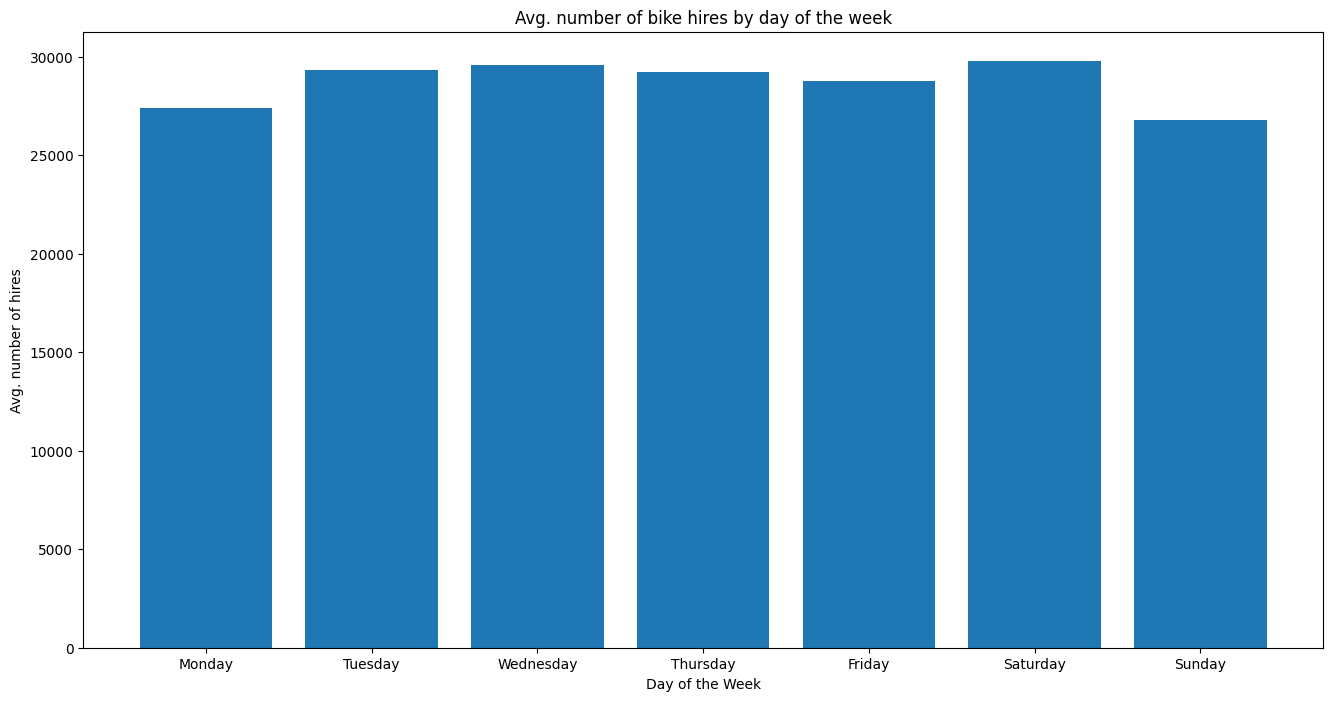

In [36]:
#Plot a bar chart of avg hire by day
plt.figure(figsize=(16,8))
plt.bar(days, avg_hires)

plt.xlabel('Day of the Week')
plt.ylabel('Avg. number of hires')
plt.title('Avg. number of bike hires by day of the week')

Sunday and Monday on average have the least hires, but the number across days is fairly consistent.

Text(0.5, 1.0, 'Avg. length of bike hires by day of the week')

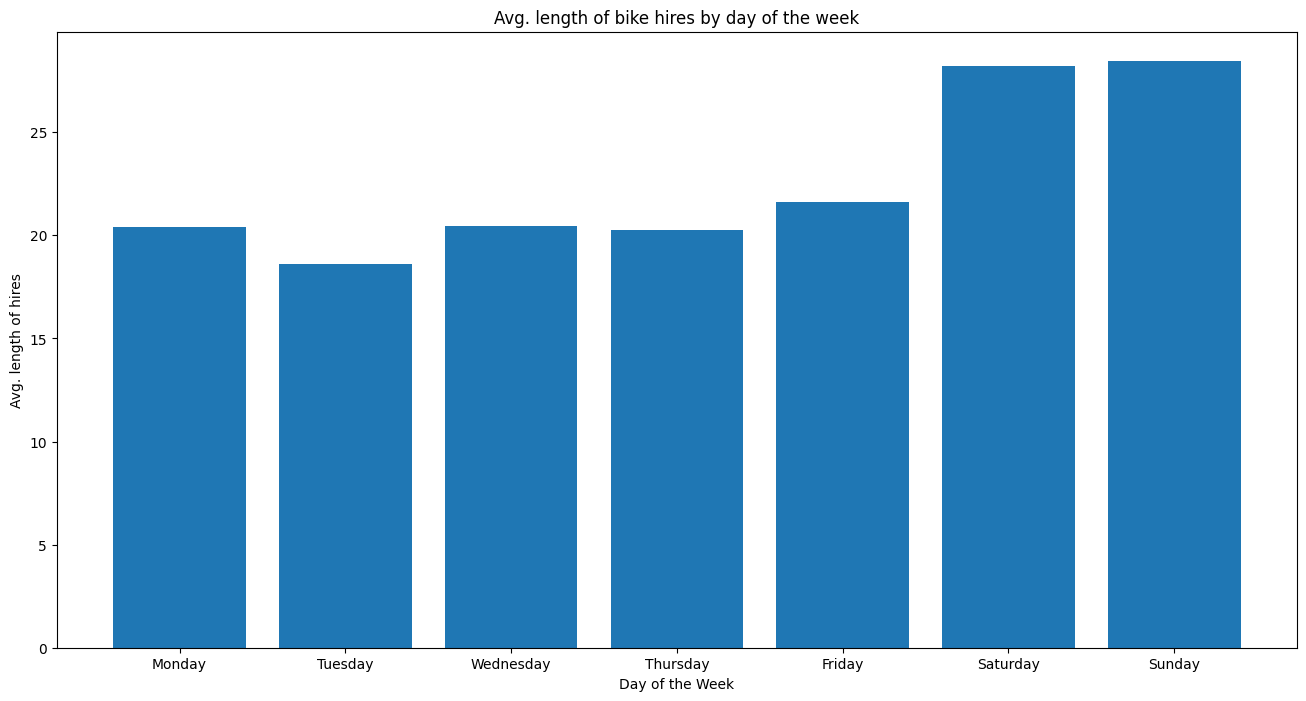

In [37]:
# Calculate the average length of hire by day
avg_hires_length = []
for d in days:
    total_length = df[df['Start Day'] == d]['Duration (mins)'].sum()
    num_hires = len(df[df['Start Day'] == d])

    avg_hires_length.append(total_length/num_hires)

#Plot a bar chart of avg hire length by day
plt.figure(figsize=(16,8))
plt.bar(days, avg_hires_length)

plt.xlabel('Day of the Week')
plt.ylabel('Avg. length of hires')
plt.title('Avg. length of bike hires by day of the week')

Hire's tend to be 20% longer on weekends - this is likely due to people hiring bikes for pleasure to ride around parks or other similar areas, rather than for short commutes

We repeat the same analysis but for time of day

In [38]:
df['Start Hour'].min()

0

In [39]:
df['Start Hour'].max()

23

In [40]:
# for use in calculations and visuals
times = range(0,24)

Text(0.5, 1.0, 'Avg. number of bike hires by hour of the day')

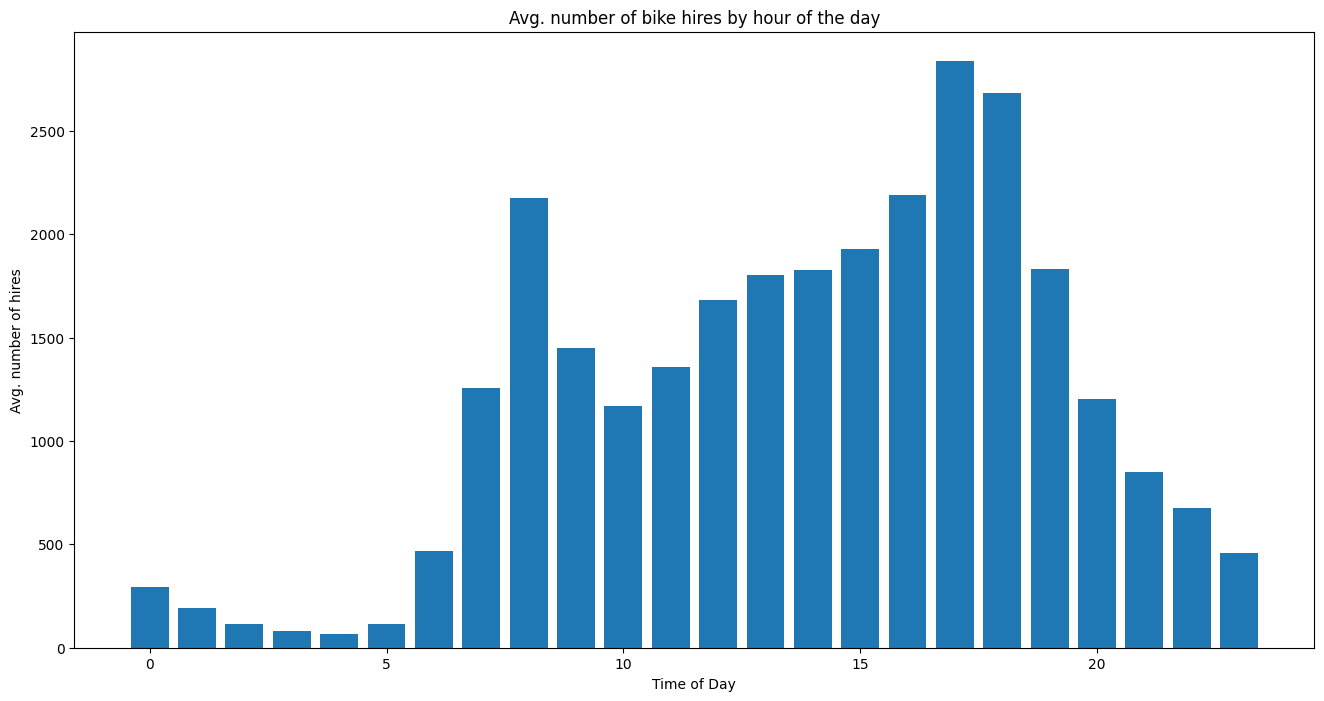

In [47]:
avg_hires = []
#visualise number of hires per hour of the day
for t in times:
    num_hires = len(df[df['Start Hour'] == t])
    num_hours = df[df['Start Hour'] == t]['Start Date'].nunique()

    avg_hires.append(num_hires/num_hours) 

#Plot a bar chart of avg hire by day
plt.figure(figsize=(16,8))
plt.bar(list(times), avg_hires)

plt.xlabel('Time of Day')
plt.ylabel('Avg. number of hires')
plt.title('Avg. number of bike hires by hour of the day')

We can see there are clear spikes during "rush hour" - highlighting many users of the bikes are using them for commuting purposes

It would be worthwhile to split these out between weekday and weekends and see the comparison side by side. Hypothesis, the spikes at rush hour will be more pronounced during weekdays.

In [51]:
avg_hires_weekday = []
avg_hires_weekend = []
#visualise number of hires per hour of the day
for t in times:
    num_hires_weekday = len(df[(df['Start Hour'] == t) & (df['Start Wkday'] == 'Weekday')])
    num_hours_weekday = df[(df['Start Hour'] == t) & (df['Start Wkday'] == 'Weekday')]['Start Date'].nunique()

    avg_hires_weekday.append(num_hires_weekday/num_hours_weekday) 

    num_hires_weekend = len(df[(df['Start Hour'] == t) & (df['Start Wkday'] == 'Weekend')])
    num_hours_weekend = df[(df['Start Hour'] == t) & (df['Start Wkday'] == 'Weekend')]['Start Date'].nunique()

    avg_hires_weekend.append(num_hires_weekend/num_hours_weekend)


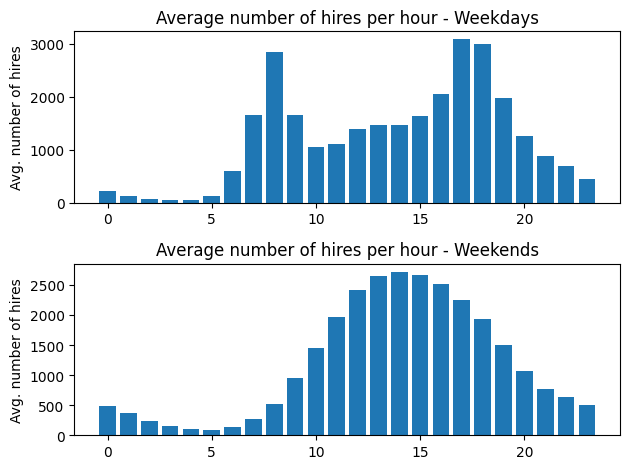

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1)

# Plot the first set of bars in the first subplot
ax1.bar(times, avg_hires_weekday)
ax1.set_title('Average number of hires per hour - Weekdays')
ax1.set_ylabel('Avg. number of hires')

# Plot the second set of bars in the second subplot
ax2.bar(times, avg_hires_weekend)
ax2.set_title('Average number of hires per hour - Weekends')
ax2.set_ylabel('Avg. number of hires')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

This clearly highlights the difference in usage between weekdays and weekends. On weekdays users tend to use the bikes at rush hour times, whereas on weekends they are used during the early afternoon. Work vs Pleasure.

In [55]:
avg_length_weekday = []
avg_length_weekend = []
#visualise average length of hires per hour of the day
for t in times:
    total_duration_weekday = df[(df['Start Hour'] == t) & (df['Start Wkday'] == 'Weekday')]['Duration (mins)'].sum()
    num_hires_weekday = len(df[(df['Start Hour'] == t) & (df['Start Wkday'] == 'Weekday')])

    avg_length_weekday.append(total_duration_weekday/num_hires_weekday) 

    total_duration_weekend = df[(df['Start Hour'] == t) & (df['Start Wkday'] == 'Weekend')]['Duration (mins)'].sum()
    num_hires_weekend = len(df[(df['Start Hour'] == t) & (df['Start Wkday'] == 'Weekend')])

    avg_length_weekend.append(total_duration_weekend/num_hires_weekend)

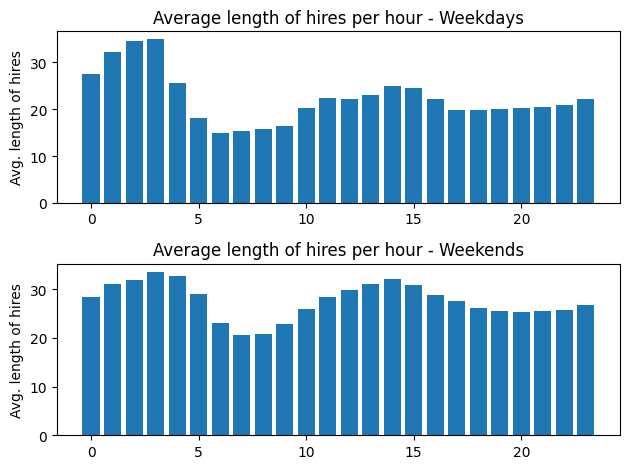

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1)

# Plot the first set of bars in the first subplot
ax1.bar(times, avg_length_weekday)
ax1.set_title('Average length of hires per hour - Weekdays')
ax1.set_ylabel('Avg. length of hires')

# Plot the second set of bars in the second subplot
ax2.bar(times, avg_length_weekend)
ax2.set_title('Average length of hires per hour - Weekends')
ax2.set_ylabel('Avg. length of hires')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

What is unusual here is that the bikes are tending to be hired for a long time during the night time hours on both weekdays and weekends.

In [57]:
start_locs = df['Start Area'].unique()

In [59]:
avg_hires = []
#visualise number of hires per start area
for s in start_locs:
    num_hires = len(df[df['Start Area'] == s])
    num_hours = df[df['Start Area'] == s]['Start Date'].nunique()

    avg_hires.append(num_hires/num_hours) 

df_start_areas = pd.DataFrame({
    'location' : start_locs,
    'avg_hires' : avg_hires
})

<Axes: title={'center': '10 most popular start locations'}, xlabel='location', ylabel='Average hires per day'>

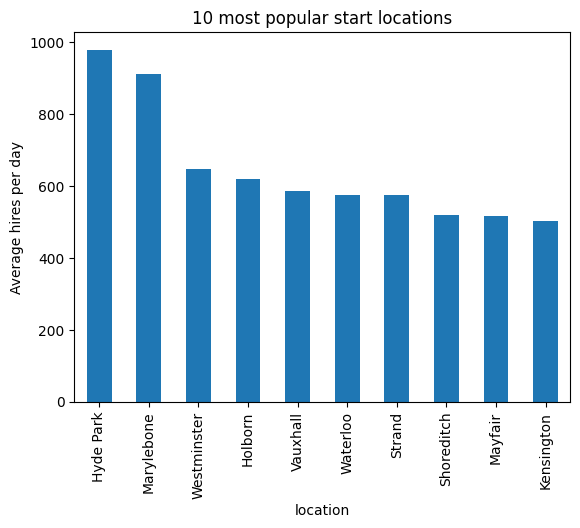

In [70]:
df_start_areas.sort_values(by='avg_hires', ascending=False).head(10).plot(kind='bar', x='location', title='10 most popular start locations', legend=False, ylabel='Average hires per day')